In [1]:
print("Python is working!")

Python is working!


In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
db_path = "/Users/YOUR_USERNAME/Desktop/revenue_dashboard.sqlite"


In [5]:
db_path = "/Users/anikaaggarwal/Desktop/revenue_dashboard_sqlite.sqbpro"


In [6]:
import sqlite3

conn = sqlite3.connect(db_path)
print("Connected successfully!")
conn.close()

Connected successfully!


In [7]:
import pandas as pd

conn = sqlite3.connect(db_path)
df = pd.read_sql_query("SELECT * FROM orders", conn)
conn.close()

df.head()

DatabaseError: Execution failed on sql 'SELECT * FROM orders': file is not a database

In [8]:
import os

print("db_path:", db_path)
print("exists:", os.path.exists(db_path))
print("size_bytes:", os.path.getsize(db_path))

db_path: /Users/anikaaggarwal/Desktop/revenue_dashboard_sqlite.sqbpro
exists: True
size_bytes: 2259


In [9]:
with open(db_path, "rb") as f:
    header = f.read(16)

header

b'<?xml version="1'

In [10]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(db_path)

# list tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

DatabaseError: Execution failed on sql 'SELECT name FROM sqlite_master WHERE type='table';': file is not a database

In [11]:
import os

print("db_path:", db_path)
print("exists:", os.path.exists(db_path))
print("size_bytes:", os.path.getsize(db_path))

with open(db_path, "rb") as f:
    print("header:", f.read(16))

db_path: /Users/anikaaggarwal/Desktop/revenue_dashboard_sqlite.sqbpro
exists: True
size_bytes: 2245
header: b'<?xml version="1'


In [12]:
db_path = "/Users/anikaaggarwal/Desktop/orders.sqlite"


In [13]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(db_path)
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,orders


In [14]:
df = pd.read_sql_query("SELECT * FROM orders", conn)
conn.close()
df.shape

(9800, 18)

In [15]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [16]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [17]:
import pandas as pd

df["Order Date"] = pd.to_datetime(
    df["Order Date"].astype(str).str.strip(),
    dayfirst=True,
    errors="coerce"
)

df["Order Date"].head()

0   2017-11-08
1   2017-11-08
2   2017-06-12
3   2016-10-11
4   2016-10-11
Name: Order Date, dtype: datetime64[ns]

In [18]:
df["Order Date"].isna().sum()


np.int64(0)

In [19]:
df["year_month"] = df["Order Date"].dt.to_period("M").astype(str)
df[["Order Date", "year_month"]].head(10)


,Order Date,year_month
0,2017-11-08,2017-11
1,2017-11-08,2017-11
2,2017-06-12,2017-06
3,2016-10-11,2016-10
4,2016-10-11,2016-10
5,2015-06-09,2015-06
6,2015-06-09,2015-06
7,2015-06-09,2015-06
8,2015-06-09,2015-06
9,2015-06-09,2015-06


In [20]:
orders_by_month = (
    df.groupby("year_month")
      .size()
      .reset_index(name="orders")
      .sort_values("year_month")
)

orders_by_month.head(12)


,year_month,orders
0,2015-01,77
1,2015-02,46
2,2015-03,154
3,2015-04,130
4,2015-05,121
5,2015-06,131
6,2015-07,142
7,2015-08,146
8,2015-09,267
9,2015-10,159


In [21]:
orders_by_month_region = (
    df.groupby(["year_month", "Region"])
      .size()
      .reset_index(name="orders")
      .sort_values(["year_month", "Region"])
)

orders_by_month_region.head(12)


,year_month,Region,orders
0,2015-01,Central,20
1,2015-01,East,10
2,2015-01,South,31
3,2015-01,West,16
4,2015-02,Central,19
5,2015-02,East,3
6,2015-02,South,8
7,2015-02,West,16
8,2015-03,Central,30
9,2015-03,East,30


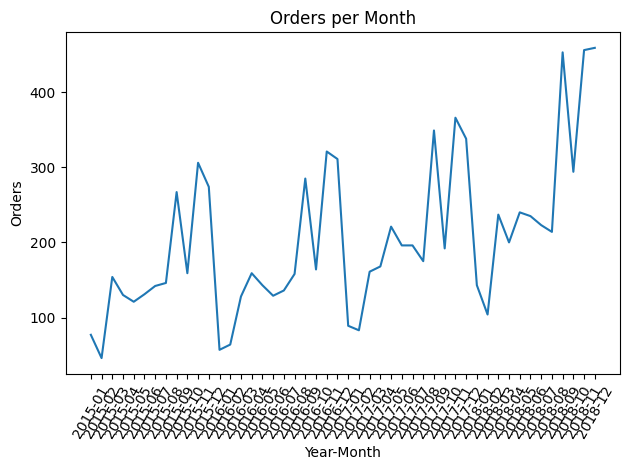

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(orders_by_month["year_month"], orders_by_month["orders"])
plt.xticks(rotation=60)
plt.title("Orders per Month")
plt.xlabel("Year-Month")
plt.ylabel("Orders")
plt.tight_layout()
plt.show()

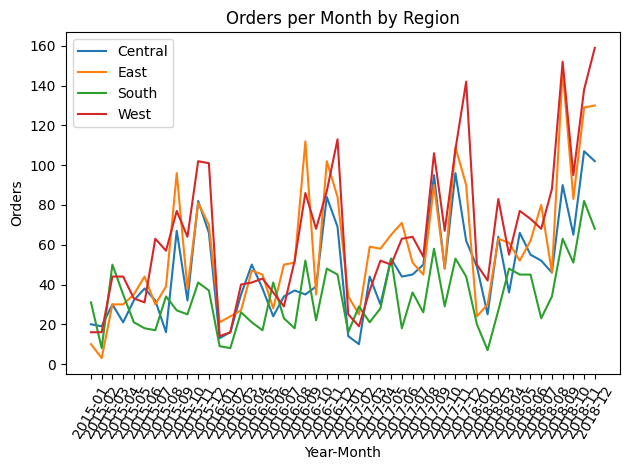

In [23]:
pivot = orders_by_month_region.pivot(
    index="year_month",
    columns="Region",
    values="orders"
).fillna(0)

plt.figure()
for region in pivot.columns:
    plt.plot(pivot.index, pivot[region], label=region)

plt.xticks(rotation=60)
plt.title("Orders per Month by Region")
plt.xlabel("Year-Month")
plt.ylabel("Orders")
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
orders_by_month_region.to_csv(
    "orders_by_month_region.csv",
    index=False
)